In [ ]:
"""
今日讲课内容：
    形态学变换
    图片颜色识别
    图片颜色替换
    图像旋转（那一块的）
    图像添加水印
    图像的梯度处理
    图像的边缘检测
"""

In [ ]:
"""
图片颜色识别
"""


In [2]:
"""
形态学变换：
    腐蚀、膨胀
    开区间、闭区间
    顶帽、黑帽
    形态学梯度
"""
import cv2
import numpy as np

arr = np.arange(0, 49).reshape((7, 7)).astype(np.uint8)
# print(arr)
# print()
k = np.array([[0, 100, 0], 
              [100, 100, 100], 
              [0, 100, 0]], dtype=np.uint8)

image_dilate = cv2.dilate(arr, k)
image_erode = cv2.erode(arr, k)
# print('膨胀')
# print(image_dilate)
# print('腐蚀')
# print(image_erode)

image = cv2.imread('images/kai.jpg')
# cv2.imshow('image', image)

kernel = np.ones((5, 5), np.uint8)
# image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
# cv2.imshow('image', image)

# image = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=2)
# cv2.imshow('image', image)

cv2.imshow('dilate', cv2.dilate(image.copy(), kernel))
cv2.imshow('erode', cv2.erode(image.copy(), kernel))

image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
cv2.imshow('image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import cv2

image = cv2.imread('images/logohq.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('Binary', binary)

image = cv2.bitwise_and(image, image, mask=binary)
cv2.imshow('image', image)
print(image.shape)

cv2.waitKey(0)
cv2.destroyAllWindows()



(78, 157, 3)


In [5]:
import cv2
import numpy as np

image = cv2.imread("images/3.png")
cv2.imshow("image", image)
cv2.setMouseCallback("image", lambda event, x, y, flags, param: print(x, y))

cv2.waitKey(0)
cv2.destroyAllWindows()

1 207
10 202
17 194
22 190
27 183
32 178
35 172
38 169
39 164
41 160
42 157
44 151
44 147
45 142
45 136
47 132
47 126
48 122
48 117
50 113
50 109
51 104
52 102
54 97
57 94
60 92
62 89
65 87
68 85
69 82
72 80
73 79
73 78
74 77
75 76
77 76
78 75
80 73
83 73
87 72
91 72
96 72
100 71
106 71
235 43
237 42
237 41
238 40
238 39
239 38
240 36
240 35
241 33
242 32
242 29
243 28
245 27
245 26
246 25
246 24
246 22
246 21
246 20
246 19
246 18
246 17
246 16
246 14
246 13
246 12
246 11
246 10
246 9
245 8
245 7
243 5
242 5
242 4
241 4
240 4
240 3
239 3
238 2
237 1
236 0
0 148
0 149
1 149
2 149
3 151
4 152
5 152
6 152
7 152
10 153
13 153
15 154
18 154
20 154
23 154
26 154
28 154
31 154
35 154
41 154
45 154
51 154
57 154
63 154
67 154
73 154
79 154
85 154
90 154
96 154
102 154
106 154
112 154
118 154
124 154
128 154
134 154
140 154
143 154
145 154
146 154
146 153
147 153
149 152
150 151
151 150
151 149
152 147
153 146
154 145
155 145
158 144
159 143
160 142
161 141
164 141
165 139
166 138
167 137
168 1

In [15]:
import cv2
image = cv2.imread("images/num.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

contours, _ = cv2.findContours(image_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, 2, (0, 255, 0), 3)

hull = cv2.convexHull(contours[2])
print(hull)
# cv2.drawContours(image, [hull], 0, (0, 255, 0), 3)
cv2.polylines(image, [hull], True, (0, 0, 255), 3)

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[167 157]]

 [[199 157]]

 [[208 163]]

 [[218 172]]

 [[225 179]]

 [[234 197]]

 [[270 273]]

 [[270 281]]

 [[260 291]]

 [[254 294]]

 [[233 300]]

 [[185 300]]

 [[178 293]]

 [[145 190]]

 [[145 176]]

 [[161 160]]]


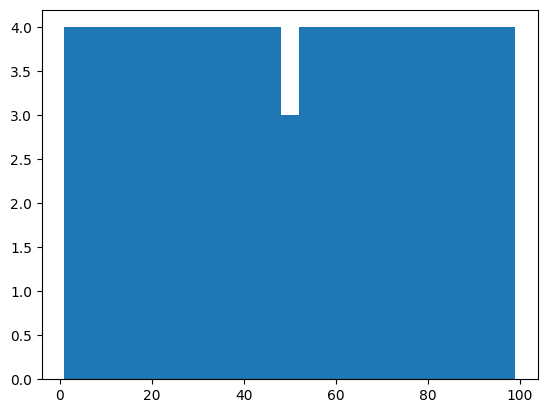

In [ ]:
import cv2
import numpy as np

image = cv2.imread('images/1.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('image', image)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
# print(hist)

re = cv2.minMaxLoc(hist)
print(re)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import numpy as np  

arr = np.arange(0, 16).reshape((4, 4))
print(np.argwhere(arr > 5))

[[1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]


In [9]:
import cv2
import numpy as np
image = cv2.imread("images/huofu.png", cv2.IMREAD_GRAYSCALE)
arr = cv2.HoughLines(image, 1, np.pi / 180, 200)
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np

image = cv2.imread('images/huofu.png')
# cv2.imshow('image', image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 20, param2=30)
circles = circles.astype(np.uint8)
print(circles)
for x, y, r in circles[0]:
    cv2.circle(image, (x, y), r, (0, 255, 0), 2)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[[177  88  32]]]


In [9]:
import cv2
import numpy as np

image = np.fromfile('images/huofu.png', dtype=np.uint8)
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2 
import numpy as np

image = cv2.imread("images/1.jpg")
# image = cv2.addWeighted(image, 0.5, image, 0, 50)

np.clip(image, 100, 200)
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()